# Model comparison

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [44]:
import json
import pandas as pd

import sys
sys.path.append('../')

from src.data_utils import load_results
from src.plot_utils import *

set_style()

# Manual vs Cipher: Robustness to key rotation

##### Load data: Model trained on fixed key

In [57]:
train_data_path = '../data/train_manual_fixed_key.pkl'

predictions_path = '../outputs/manual/predictions/char_cnn_fixed_key_pred_test_manual_fixed_key.pkl'
pred_same_key = load_results(train_data_path, predictions_path)
pred_same_key['Test Set'] = 'Fixed Key'

predictions_path = '../outputs/manual/predictions/char_cnn_fixed_key_pred_test_manual_different_key.pkl'
pred_different_key = load_results(train_data_path, predictions_path)
pred_different_key['Test Set'] = 'Rotate Key'

pred_key_fixed = pd.concat([pred_same_key, pred_different_key])

plain_key_fixed = pred_key_fixed.groupby('Label').get_group('plain')
cipher_key_fixed = pred_key_fixed.groupby('Label').get_group('cipher')

In [116]:
with open('../outputs/manual/predictions/char_cnn_fixed_key_val_test_manual_fixed_key.json') as f:
    val = json.load(f)

print('Average test set accuracy for train on fixed, test on fixed: %.2f'%(np.mean(val['accuracy'])*100))

Average test set accuracy for train on fixed, test on fixed: 99.85


In [119]:
with open('../outputs/manual/predictions/char_cnn_fixed_key_val_test_manual_different_key.json') as f:
    val = json.load(f)

print('Average test set accuracy for train on fixed, test on rotate: %.2f'%(np.mean(val['accuracy'])*100))

Average test set accuracy for train on fixed, test on rotate: 99.72


##### Load data: Model trained on rotating keys

In [58]:
train_data_path = '../data/train_manual_key_rot.pkl'

predictions_path = '../outputs/manual/predictions/char_cnn_key_rot_pred_test_manual_fixed_key.pkl'
pred_same_key = load_results(train_data_path, predictions_path)
pred_same_key['Test Set'] = 'Fixed Key'

predictions_path = '../outputs/manual/predictions/char_cnn_key_rot_pred_test_manual_different_key.pkl'
pred_different_key = load_results(train_data_path, predictions_path)
pred_different_key['Test Set'] = 'Rotate Key'

pred_key_rot = pd.concat([pred_same_key, pred_different_key])

plain_key_rot = pred_key_rot.groupby('Label').get_group('plain')
cipher_key_rot = pred_key_rot.groupby('Label').get_group('cipher')

In [118]:
with open('../outputs/manual/predictions/char_cnn_key_rot_val_test_manual_fixed_key.json') as f:
    val = json.load(f)

print('Average test set accuracy for train on rotate, test on fixed: %.2f'%(np.mean(val['accuracy'])*100))

Average test set accuracy for train on rotate, test on fixed: 99.97


In [120]:
with open('../outputs/manual/predictions/char_cnn_key_rot_val_test_manual_different_key.json') as f:
    val = json.load(f)

print('Average test set accuracy for train on rotate, test on rotate: %.2f'%(np.mean(val['accuracy'])*100))

Average test set accuracy for train on rotate, test on rotate: 99.97


##### Plot false negative rate

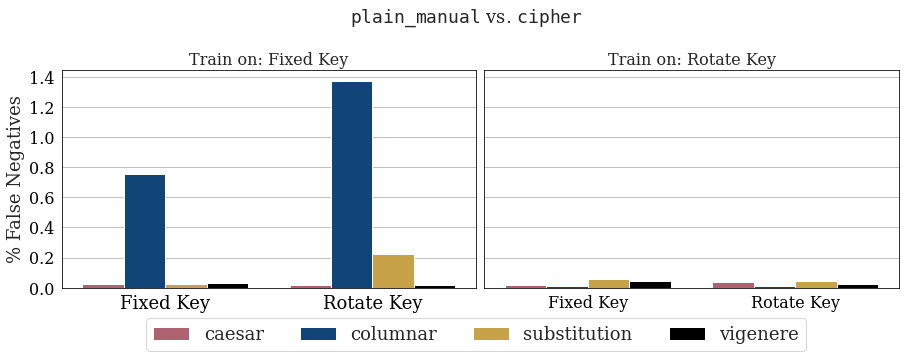

In [59]:
model_names = ['Train on: Fixed Key','Train on: Rotate Key']
fig = plt_false_negatives(cipher_key_fixed, cipher_key_rot, model_names,
                          x='Test Set', hue='Cipher',
                          x_order=['Fixed Key', 'Rotate Key'], hue_filter=['caesar', 'columnar', 'substitution', 'vigenere'])

fig.suptitle('$\mathtt{plain\_manual}$ vs. $\mathtt{cipher}$', y=1.1, fontsize=FSIZELABELS);

fig.savefig('../report/graphics/fn_fixed_key.pdf', bbox_inches='tight')

# Manual vs Cipher: Robustness to new substitution ciphers

##### Load data: Train on fixed key

In [60]:
predictions_path = '../outputs/manual/predictions/char_cnn_fixed_key_pred_test_manual_fixed_key.pkl'
pred_all = load_results(train_data_path, predictions_path)
pred_all['Model'] = 'All Ciphers'

predictions_path = '../outputs/manual/predictions/char_cnn_fixed_key_drop_caesar_pred_test_manual_fixed_key.pkl'
pred_drop_ceasar = load_results(train_data_path, predictions_path)
pred_drop_ceasar['Model'] = 'No Caesar'

predictions_path = '../outputs/manual/predictions/char_cnn_fixed_key_drop_substitution_pred_test_manual_fixed_key.pkl'
pred_drop_subst = load_results(train_data_path, predictions_path)
pred_drop_subst['Model'] = 'No Subst'

predictions_drop_fixed = pd.concat([pred_all, pred_drop_ceasar, pred_drop_subst])

plain_drop_fixed = predictions_drop_fixed.groupby('Label').get_group('plain')

cipher_drop_fixed = predictions_drop_fixed.groupby('Label').get_group('cipher')

##### Load data: Train on rotate key

In [61]:
predictions_path = '../outputs/manual/predictions/char_cnn_key_rot_pred_test_manual_fixed_key.pkl'
pred_all = load_results(train_data_path, predictions_path)
pred_all['Model'] = 'All Ciphers'

predictions_path = '../outputs/manual/predictions/char_cnn_key_rot_drop_caesar_pred_test_manual_fixed_key.pkl'
pred_drop_ceasar = load_results(train_data_path, predictions_path)
pred_drop_ceasar['Model'] = 'No Caesar'

predictions_path = '../outputs/manual/predictions/char_cnn_key_rot_drop_substitution_pred_test_manual_fixed_key.pkl'
pred_drop_subst = load_results(train_data_path, predictions_path)
pred_drop_subst['Model'] = 'No Subst'

predictions_drop_rot = pd.concat([pred_all, pred_drop_ceasar, pred_drop_subst])

plain_drop_rot = predictions_drop_rot.groupby('Label').get_group('plain')

cipher_drop_rot = predictions_drop_rot.groupby('Label').get_group('cipher')

##### Plot false negatives

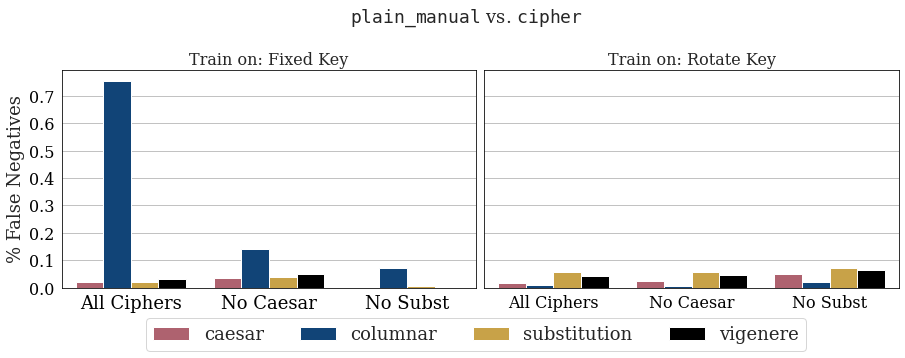

In [62]:
model_names = ['Train on: Fixed Key','Train on: Rotate Key']
fig = plt_false_negatives(cipher_drop_fixed, cipher_drop_rot, model_names,
                          x='Model', hue='Cipher',
                          x_order=['All Ciphers', 'No Caesar', 'No Subst'], hue_filter=['caesar', 'columnar', 'substitution', 'vigenere'])

fig.suptitle('$\mathtt{plain\_manual}$ vs. $\mathtt{cipher}$', y=1.1, fontsize=FSIZELABELS);

fig.savefig('../report/graphics/fn_drop_cipher.pdf', bbox_inches='tight')

# Sensor vs. Cipher: Robustness to key rotation

##### Trained on fixed

In [33]:
train_data_path = '../data/train_sensor_fixed_key.pkl'

predictions_path = '../outputs/sensor/predictions/char_cnn_fixed_key_pred_test_sensor_fixed_key.pkl'
pred_same_key = load_results(train_data_path, predictions_path)
pred_same_key['Test Set'] = 'Fixed Key'

predictions_path = '../outputs/sensor/predictions/char_cnn_fixed_key_pred_test_sensor_different_key.pkl'
pred_different_key = load_results(train_data_path, predictions_path)
pred_different_key['Test Set'] = 'Rotate Key'

pred_key_fixed = pd.concat([pred_same_key, pred_different_key])

plain_key_fixed = pred_key_fixed.groupby('Label').get_group('plain')
cipher_key_fixed = pred_key_fixed.groupby('Label').get_group('cipher')

##### Trained on rotating

In [34]:
train_data_path = '../data/train_sensor_key_rot.pkl'

predictions_path = '../outputs/sensor/predictions/char_cnn_key_rot_pred_test_sensor_fixed_key.pkl'
pred_same_key = load_results(train_data_path, predictions_path)
pred_same_key['Test Set'] = 'Fixed Key'

predictions_path = '../outputs/sensor/predictions/char_cnn_key_rot_pred_test_sensor_different_key.pkl'
pred_different_key = load_results(train_data_path, predictions_path)
pred_different_key['Test Set'] = 'Rotate Key'

pred_key_rot = pd.concat([pred_same_key, pred_different_key])

plain_key_rot = pred_key_rot.groupby('Label').get_group('plain')
cipher_key_rot = pred_key_rot.groupby('Label').get_group('cipher')

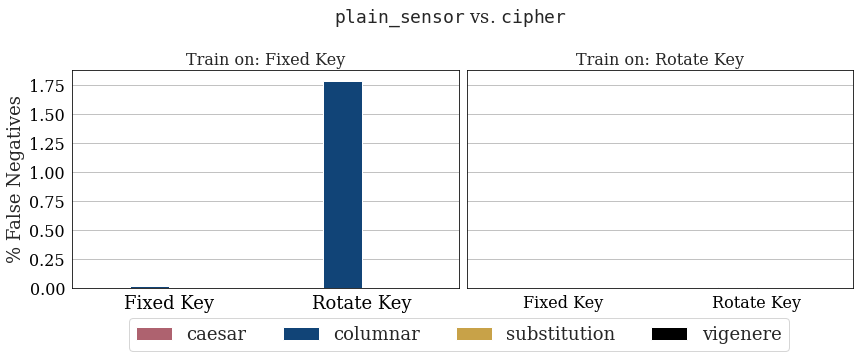

In [35]:
model_names = ['Train on: Fixed Key','Train on: Rotate Key']
fig = plt_false_negatives(cipher_key_fixed, cipher_key_rot, model_names,
                          x='Test Set', hue='Cipher',
                          x_order=['Fixed Key', 'Rotate Key'], hue_filter=['caesar', 'columnar', 'substitution', 'vigenere'])

fig.suptitle('$\mathtt{plain\_sensor}$ vs. $\mathtt{cipher}$', y=1.1, fontsize=FSIZELABELS);

fig.savefig('../report/graphics/fn_sensor.pdf', bbox_inches='tight')

In [37]:
false_negatives = cipher_key_fixed[cipher_key_fixed['Prediction Correct'] == False]
false_negatives.groupby(['Key in Train', 'Cipher']).size()/cipher_key_fixed.groupby(['Key in Train', 'Cipher']).size()

Key in Train  Cipher      
False         caesar               NaN
              columnar        0.017908
              fakeaes              NaN
              substitution         NaN
              vigenere             NaN
True          caesar               NaN
              columnar        0.000156
              fakeaes              NaN
              substitution         NaN
              vigenere             NaN
dtype: float64

# Cipher vs. Manual vs. Sensor

In [66]:
train_data_path = '../data/train_mixed.pkl'

predictions_path = '../outputs/mixed/predictions/char_cnn_key_rot_pred_test_mixed.pkl'
pred_mixed = load_results(train_data_path, predictions_path)

In [39]:
misclassified = pred_mixed[pred_mixed['Prediction Correct'] == False]
misclassified.groupby('Label').size()/pred_mixed.groupby('Prediction').size()

cipher    0.006612
manual    0.000243
sensor         NaN
dtype: float64

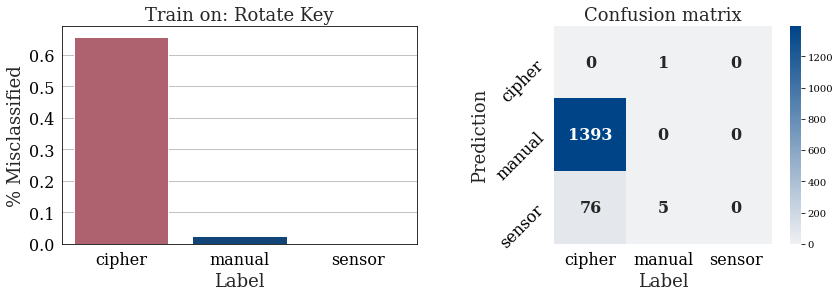

In [107]:
fig = plt_error(pred_mixed, 'Train on: Rotate Key')
fig.savefig('../report/graphics/three_classes.pdf', bbox_inches='tight')

In [65]:
with open('../outputs/mixed/predictions/char_cnn_key_rot_val_test_mixed.json') as f:
    val = json.load(f)

print('Average test set accuracy :', np.mean(val['accuracy']))

Average test set accuracy : 0.9949436430451952
